# Introduction & Objective 
This notebook aims to design and develop a Naives-Bayes model that can accurately predict whether a given email is spam or not. By Alexander Peltier and Gabriel Aracena.

## Problem Statement
In the contemporary digital environment, email communication is indispensable for personal and professional interactions. However, the utility and efficiency of email are significantly hampered by the prevalence of unsolicited emails (spam), which not only contribute to email clutter but also pose substantial security risks through the potential inclusion of malware. To address these challenges and enhance the security and efficiency of computer networks, there is a critical need for effective spam detection mechanisms.

This project aims to develop a spam email detector leveraging a Bayesian machine learning model. The detector will analyze email message characteristics to accurately identify and filter out spam emails, thereby reducing unwanted email traffic and augmenting the security of computer networks. The dataset selected for training and testing the model is the "Email Spam Dataset" available on the Kaggle website.

## Algorithm of the solution
The algorithm best suited for this task is the Naive Bayes classifier. This algorithm is particularly effective for text classification tasks, including spam detection, due to its simplicity, efficiency, and accuracy, especially when dealing with large datasets.

Giving the dataset we are asked to use, the best choice among the many Naive Bayes classifiers available would be the Multinomial Naive Bayes classifier. The Multinomial Naive Bayes algorithm is particularly well-suited for text classification problems where features (words in the email body in this case) represent the frequency of the words. This model works on the principle of conditional probability, as outlined by Bayes' Theorem, and the "naive" assumption of independence between every pair of features. It calculates the probability of each class (spam or not spam) for a given email and classifies the email based on the highest probability.

## Analysis of the findings
We found that using a Multinomial Naive Bayes Classifier, with a TfIdfVectorizer results in a Spam Email Filtering of 92% accuracy

## References
The data was retrieved from the Email Spam Dataset on Kaggle at https://www.kaggle.com/datasets/nitishabharathi/email-spam-dataset?resource=download&select=enronSpamSubset.csv

### Importing Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import string

### Data setup and exploration
We decided to use a combination of the three datasets available on the Email Spam Dataset to provide more resources for our classifier and prevent overfitting.

Wanted to highlight that this was only possible because all dataset shared 2 things in common:
* Body: feature column with the body of the email
* Label: predictor column with 0 for real emails and 1 for fake emails

We don't really care about the other columns

In [2]:
dataframe1 = pd.read_csv('../data/completeSpamAssassin.csv')
dataframe2 = pd.read_csv('../data/lingSpam.csv')
dataframe3 = pd.read_csv('../data/enronSpamSubset.csv')

combined_df = pd.concat([dataframe1, dataframe2, dataframe3], ignore_index=True)
combined_df


,Unnamed: 0,Body,Label,Unnamed: 0.1
0,0,\r\nSave up to 70% on Life Insurance.\r\nWhy S...,1,NaN
1,1,1) Fight The Risk of Cancer!\r\nhttp://www.adc...,1,NaN
2,2,1) Fight The Risk of Cancer!\r\nhttp://www.adc...,1,NaN
3,3,##############################################...,1,NaN
4,4,I thought you might like these:\r\n1) Slim Dow...,1,NaN
...,...,...,...,...
18646,26222,"Subject: monday 22 nd oct\r\n louise ,\r\n do ...",0,26222.0
18647,18630,Subject: missing bloomberg deals\r\n stephanie...,0,18630.0
18648,18451,Subject: eops salary survey questionnaire\r\n ...,0,18451.0
18649,21955,"Subject: q 3 comparison\r\n hi louise ,\r\n i ...",0,21955.0


### Data Preprocessing

In [3]:
combined_df['Body'] = combined_df['Body'].apply(lambda text: text.translate(str.maketrans('', '', string.punctuation)).lower() if isinstance(text, str) else text)

combined_df['Body'] = combined_df['Body'].fillna('')

### Preparing training and testing sets
Here we used a split of 10% of testing dataset and 90% of training dataset

In [4]:
X_train, X_test, y_train, y_test = train_test_split(combined_df['Body'], combined_df['Label'], test_size=0.1, random_state=42)


### Improve the model
We use TfidfVectorizer to transform tokens and strings into numerical values for better utilization of the algorithm

In [5]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

### Building the Bayesian model
Again, we decided to use a Multinomial Naive Bayes model since we seem it the most appropriate for our problem

In [6]:
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

MultinomialNB()

### Make predictions using the test set

In [7]:
predicted = clf.predict(X_test_tfidf)

### Output interpretation

In [8]:
print("Accuracy:", metrics.accuracy_score(y_test, predicted))
print("F1-Score:", metrics.f1_score(y_test, predicted))
print("Recall:", metrics.recall_score(y_test, predicted))


Accuracy: 0.9180064308681672
F1-Score: 0.8813033359193173
Recall: 0.8079658605974396


### Final spam identification results

In [9]:
for i in range(10):
    print(f"Email text: {X_test.iloc[i]}")
    print(f"Actual label: {y_test.iloc[i]}")
    print(f"Predicted label: {predicted[i]}\n")

Email text: subject languaging 99 conference
 
 call for papers languaging 99  a conference across literature  linguistics  and writing sponsored by the university of north texas and the gsea conference dates 4  7 march 1999 conference location university of north texas  denton  texas conference purpose languaging 99 offers a forum for scholars from the disciplines of linguistics  literature  and writing  as well as the related disciplines of anthropology  art  communication theory  cultural studies  film  history  music  philosophy  psychology  theater  etc   to examine  language  and  texts  both within these disciplines and across these disciplines  submission deadlines u  s  mail  postmarked 10 october 1998 email  15 october 1998 notification  10 december 1998 submissions we encourage submissions that examine  language  and  texts  both within and across the following    literature   linguistics   writing  includes rhetoric  composition  technical writing  creative writing    relat

### Model verification

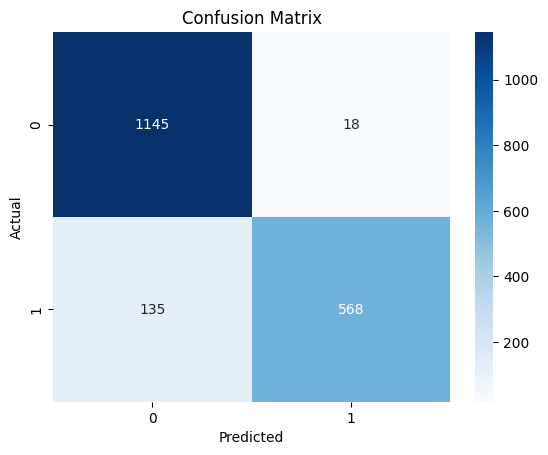

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predicted)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

